# Importing Libraries and dependencies

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from IPython.display import display

import warnings

warnings.filterwarnings('ignore')

sys.path.append('..')

In [3]:
from scripts import dataframe as dfr
from scripts import matrix as mx
from scripts import regression as rgr

# Downloading the data

In [4]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [5]:
# !wget $data -O churn_data.csv

# Reading and refining the data

In [6]:
df = pd.read_csv('churn_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df =  dfr.data_frame_refining(df)
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [8]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


# Changing object type column to numeric

In [9]:
df.totalcharges.dtype

dtype('O')

In [10]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

# Watching the errors while changing to numeric and filling them with 0

In [11]:
df[tc.isna()][['customerid','totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [12]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

In [13]:
df.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

# Changing the target variables into integer

In [14]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [15]:
df.churn = (df.churn == 'yes').astype(int)

In [16]:
df.churn.dtype

dtype('int64')

# Train test splitting into three parts

In [17]:
df_full_train, df_test = train_test_split(df,test_size=0.2,random_state=1)

In [18]:
df_train, df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)

In [19]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [20]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [21]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [22]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

# Calculating overall churn rate

In [23]:
df_full_train = df_full_train.reset_index(drop=True)

In [24]:
df_full_train.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [25]:
df_full_train.churn.value_counts(normalize = True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [26]:
churn_rate = round((df_full_train.churn.mean()),2)
churn_rate

0.27

# Listing the categorical columns

In [27]:
cat_columns = list(df.dtypes[df.dtypes == 'object'].index)
cat_columns.remove('customerid')
cat_columns

['gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [28]:
df_full_train[cat_columns].nunique()

gender              2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# Calculating risk factor and churn rate for each column

In [29]:
churn_rate_female = round((df_full_train[df_full_train.gender == 'female'].churn.mean()),2)
churn_rate_female

0.28

In [30]:
churn_rate_male = round((df_full_train[df_full_train.gender == 'male'].churn.mean()),2)
churn_rate_male

0.26

In [31]:
global_churn = round((df_full_train.churn.mean()),2)
global_churn

0.27

In [32]:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [33]:
churn_rate_partner_yes = round((df_full_train[df_full_train.partner == 'yes'].churn.mean()),2)
churn_rate_partner_yes

0.21

In [34]:
churn_rate_partner_no = round((df_full_train[df_full_train.partner == 'no'].churn.mean()),2)
churn_rate_partner_no

0.33

In [35]:
churn_rate_female/global_churn

1.037037037037037

In [36]:
churn_rate_male/global_churn

0.9629629629629629

In [37]:
churn_rate_partner_yes/global_churn

0.7777777777777777

In [38]:
churn_rate_partner_no/global_churn

1.222222222222222

In [39]:
dfr.display_risk_factor(df_full_train,cat_columns,global_churn)

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006824,1.025274
male,0.263214,2838,-0.006786,0.974865


*******
*******
partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059809,1.221515
yes,0.205033,2702,-0.064967,0.759383


*******
*******
dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043760,1.162074
yes,0.165666,1666,-0.104334,0.613579


*******
*******
phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028684,0.893764
yes,0.273049,5087,0.003049,1.011292


*******
*******
multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012593,0.953361
no_phone_service,0.241316,547,-0.028684,0.893764
yes,0.290742,2387,0.020742,1.076820


*******
*******
internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077653,0.712398
fiber_optic,0.425171,2479,0.155171,1.574709
no,0.077805,1221,-0.192195,0.288167


*******
*******
onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150921,1.558967
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.153226,1612,-0.116774,0.567503


*******
*******
onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134323,1.497494
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.217232,1915,-0.052768,0.804564


*******
*******
deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125875,1.466205
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.230412,1940,-0.039588,0.853379


*******
*******
techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148914,1.551534
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.159926,1632,-0.110074,0.592320


*******
*******
streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072832,1.269747
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.302723,2167,0.032723,1.121195


*******
*******
streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068906,1.255209
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.307273,2200,0.037273,1.138047


*******
*******
contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161701,1.598893
one_year,0.120573,1186,-0.149427,0.446568
two_year,0.028274,1344,-0.241726,0.104718


*******
*******
paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097929,0.637300
yes,0.338151,3321,0.068151,1.252412


*******
*******
paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101829,0.622854
credit_card_(automatic),0.164339,1217,-0.105661,0.608661
electronic_check,0.455890,1893,0.185890,1.688482
mailed_check,0.193870,1305,-0.076130,0.718036


*******
*******


# Calculating feature importance using mutual info score for the categorical columns

In [40]:
mutual_info_score(df_full_train.contract,df_full_train.churn)

0.0983203874041556

In [41]:
mi = dfr.calculate_mut_score(df_full_train,cat_columns,True)
print(mi)

[('contract', 0.09832), ('onlinesecurity', 0.06309), ('techsupport', 0.06103), ('internetservice', 0.05587), ('onlinebackup', 0.04692), ('deviceprotection', 0.04345), ('paymentmethod', 0.04321), ('streamingtv', 0.03185), ('streamingmovies', 0.03158), ('paperlessbilling', 0.01759), ('dependents', 0.01235), ('partner', 0.00997), ('multiplelines', 0.00086), ('phoneservice', 0.00023), ('gender', 0.00012)]


# Calculating feature importance using correlation for the numerical columns

In [42]:
df.tenure.max()

72

In [43]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [44]:
numerical_cols = ['tenure','monthlycharges','totalcharges']
numerical_cols

['tenure', 'monthlycharges', 'totalcharges']

In [45]:
df_full_train[numerical_cols].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [46]:
df_full_train[df_full_train['tenure'] <= 2].churn.mean()

0.5953420669577875

In [47]:
df_full_train[(df_full_train['tenure'] >= 2) & (df_full_train['tenure'] < 12)].churn.mean()

0.42480883602378927

In [48]:
df_full_train[df_full_train['tenure'] > 12].churn.mean()

0.17634908339788277

# Adding the 'seniorcitizen' column into categorical column

In [49]:
cat_columns = cat_columns + ['seniorcitizen']

# Using dict vectorizing for changing the categorical columns into numerical

In [50]:
train_dicts = df_train[cat_columns + numerical_cols].to_dict(orient = 'records')
val_dicts = df_val[cat_columns + numerical_cols].to_dict(orient = 'records')
test_dicts = df_test[cat_columns + numerical_cols].to_dict(orient = 'records')

In [51]:
dv = DictVectorizer(sparse = False)

In [52]:
X_train = dv.fit_transform(train_dicts)

In [53]:
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

In [54]:
X_train.shape , X_val.shape , X_test.shape

((4225, 45), (1409, 45), (1409, 45))

# Examining sigmoid function and its graphs

In [60]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [61]:
z = np.linspace(-5,5,50)
z

array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
       -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
       -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
       -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
       -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
        0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
        1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
        2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
        3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
        4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ])

In [62]:
sig_z = sigmoid(z)
sig_z

array([0.00669285, 0.00819568, 0.01003256, 0.01227603, 0.01501357,
       0.01835024, 0.0224116 , 0.02734679, 0.03333169, 0.04057176,
       0.04930426, 0.05979915, 0.07235796, 0.0873094 , 0.10500059,
       0.12578244, 0.14998817, 0.17790412, 0.20973382, 0.24555731,
       0.28529068, 0.32865255, 0.37514569, 0.42406149, 0.47451191,
       0.52548809, 0.57593851, 0.62485431, 0.67134745, 0.71470932,
       0.75444269, 0.79026618, 0.82209588, 0.85001183, 0.87421756,
       0.89499941, 0.9126906 , 0.92764204, 0.94020085, 0.95069574,
       0.95942824, 0.96666831, 0.97265321, 0.9775884 , 0.98164976,
       0.98498643, 0.98772397, 0.98996744, 0.99180432, 0.99330715])

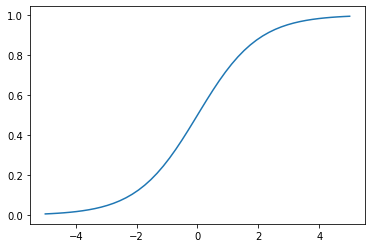

In [63]:
plt.plot(z,sigmoid(z))

# Model defination and training

In [65]:
model = LogisticRegression()

In [66]:
model.fit(X_train,y_train)

LogisticRegression()

# Finding out the bias and weights

In [73]:
model.coef_[0]

array([ 4.74754796e-01, -1.74870209e-01, -4.07557400e-01, -2.96841003e-02,
       -7.79887136e-02,  6.26793185e-02, -8.89617007e-02, -8.13904316e-02,
       -3.43078286e-02, -7.33649853e-02, -3.35216007e-01,  3.16504894e-01,
       -8.89617007e-02,  3.67450457e-03, -2.58125938e-01,  1.41444625e-01,
        9.00849919e-03,  6.25267586e-02, -8.89617007e-02, -8.12378717e-02,
        2.65580226e-01, -8.89617007e-02, -2.84291339e-01, -2.31192220e-01,
        1.23519406e-01, -1.66017520e-01,  5.83447060e-02, -8.70089645e-02,
       -3.20559070e-02,  7.04760226e-02, -5.90839650e-02,  1.41444625e-01,
       -2.49117439e-01,  2.15474613e-01, -1.20369469e-01, -8.89617007e-02,
        1.01658356e-01, -7.08978220e-02, -8.89617007e-02,  5.21867089e-02,
        2.13371835e-01, -8.89617007e-02, -2.32082948e-01, -7.04140286e-02,
        3.82463659e-04])

In [69]:
model.coef_.shape

(1, 45)

In [1]:
model.intercept_[0] # This is the bias term

NameError: name 'model' is not defined

# Predicting using the model

In [77]:
model.predict(X_train[:5])

array([0, 1, 1, 1, 0])

In [78]:
model.predict_proba(X_train[:5])

array([[0.90451195, 0.09548805],
       [0.32066924, 0.67933076],
       [0.36632094, 0.63367906],
       [0.28247531, 0.71752469],
       [0.95231942, 0.04768058]])

In [80]:
y_pred = model.predict_proba(X_val)[:,1]

In [85]:
churn_dec = (y_pred >=0.5)
churn_dec.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [86]:
(y_val == churn_dec).mean()

0.8034066713981547

In [88]:
df_pred = pd.DataFrame()
df_pred['prob'] = y_pred
df_pred['pred'] = churn_dec.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.pred == df_pred.actual
df_pred

,prob,pred,actual,correct
0,0.008996,0,0,True
1,0.204545,0,0,True
2,0.212245,0,0,True
3,0.543051,1,1,True
4,0.213805,0,0,True
...,...,...,...,...
1404,0.313647,0,0,True
1405,0.039355,0,1,False
1406,0.136388,0,0,True
1407,0.799769,1,1,True


In [89]:
df_pred.correct.mean()

0.8034066713981547

In [92]:
dict(zip(dv.get_feature_names(),model.coef_[0].round(4)))

{'contract=month-to-month': 0.4748,
 'contract=one_year': -0.1749,
 'contract=two_year': -0.4076,
 'dependents=no': -0.0297,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.0627,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.0814,
 'gender=female': -0.0343,
 'gender=male': -0.0734,
 'internetservice=dsl': -0.3352,
 'internetservice=fiber_optic': 0.3165,
 'internetservice=no': -0.089,
 'monthlycharges': 0.0037,
 'multiplelines=no': -0.2581,
 'multiplelines=no_phone_service': 0.1414,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.0625,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.0812,
 'onlinesecurity=no': 0.2656,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.2843,
 'paperlessbilling=no': -0.2312,
 'paperlessbilling=yes': 0.1235,
 'partner=no': -0.166,
 'partner=yes': 0.0583,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.0321,
 'paymentmethod=elec

# Taking sample of the dataframe and finding the bias and weights

In [102]:
df_train_small = df_train[['contract','tenure','monthlycharges']].to_dict(orient = 'records')
df_val_small = df_val[['contract','tenure','monthlycharges']].to_dict(orient = 'records')

In [103]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(df_train_small)
dv_small.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [104]:
X_train_small = dv_small.transform(df_train_small)
X_train_small.shape

(4225, 5)

In [105]:
model_small = LogisticRegression()

In [106]:
model_small.fit(X_train_small,y_train)

LogisticRegression()

In [110]:
w0 = model_small.intercept_[0]
w0

-2.47677566381025

In [111]:
w = model_small.coef_[0].round(4)
w

array([ 0.97  , -0.0251, -0.9487,  0.0275, -0.0362])

In [112]:
dict(zip(dv_small.get_feature_names(),w))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.0251,
 'contract=two_year': -0.9487,
 'monthlycharges': 0.0275,
 'tenure': -0.0362}

# Training the model using val + train set and testing it using test set

In [121]:
dict_df_full = df_full_train[cat_columns+numerical_cols].to_dict(orient='records')

In [122]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dict_df_full)
y_full_train = df_full_train.churn

In [123]:
model_full = LogisticRegression().fit(X_full_train,y_full_train)

In [125]:
dict_df_test = df_test[cat_columns+numerical_cols].to_dict(orient='records')
X_test = dv.transform(dict_df_test)

In [127]:
y_predict = model.predict_proba(X_test)[:,1]

In [128]:
churn_decision = y_predict >= 0.5

In [129]:
(churn_decision == y_test ).mean()

0.808374733853797

In [134]:
model.predict_proba(dv.transform(dict_df_test[100]))[0,1]

0.2094033134347453

In [132]:
y_test[100]

1